# Models

In [ ]:
import pandas as pd

# Define the category ranges
categories = range(0, 80000, 10000)  # Ranges from 0 to 70k in steps of 10k

# Define the category labels
labels = ['0-10k','10k-20k','20k-30k','30k-40k', '40k-50k', '50k-60k', '60k-70k']

# Add a new column to the DataFrame with categorical values
proces_data['Price_Category'] = pd.cut(proces_data['Price'], bins=categories, labels=labels, include_lowest=True)

# Convert the 'Price_Category' column to categorical dtype if needed
proces_data['Price_Category'] = proces_data['Price_Category'].astype('category')


In [ ]:
proces_data['Price_Category'] = proces_data['Price_Category'].replace('60k-70k','50k-70k')
proces_data['Price_Category'] = proces_data['Price_Category'].replace('50k-60k','50k-70k')

14.5174571805006 457.35013175230574


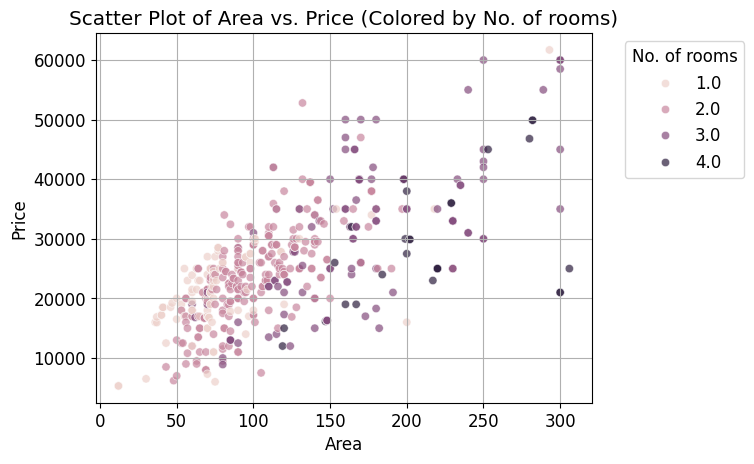

Guadalajara
Lineal Regression:
Mean Squared Error: 43959307.60137564
Mean Absolute Error: 5066.63991975046
R-squared: 0.6115191765531338
Root Mean Squared Error: 6630.181566245048
Polynomial Regression:
Mean Squared Error: 70593399.58856519
Mean Absolute Error: 5673.392506071273
R-squared: 0.3761461793083095
Root Mean Squared Error: 8401.987835540182
7.501888625080966 377.7407547305561


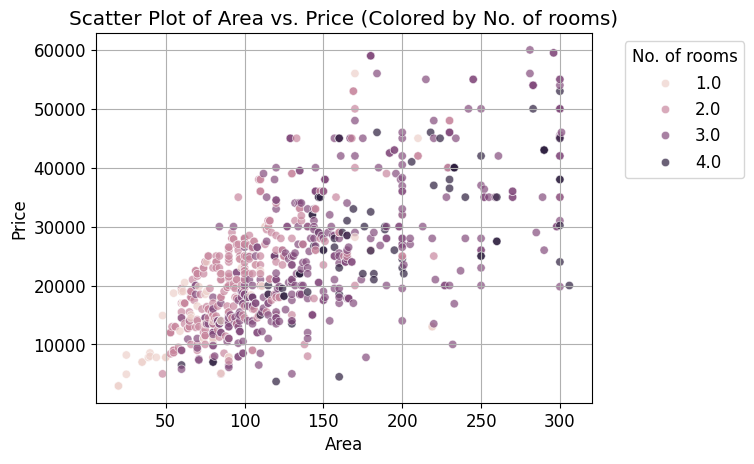

Zapopan
Lineal Regression:
Mean Squared Error: 54103876.10106189
Mean Absolute Error: 5851.021316149148
R-squared: 0.5386326111814185
Root Mean Squared Error: 7355.533706065243
Polynomial Regression:
Mean Squared Error: 48798227.54990205
Mean Absolute Error: 5664.764898097662
R-squared: 0.58387619434846
Root Mean Squared Error: 6985.572814730518
19.842267529017676 153.51075069950045


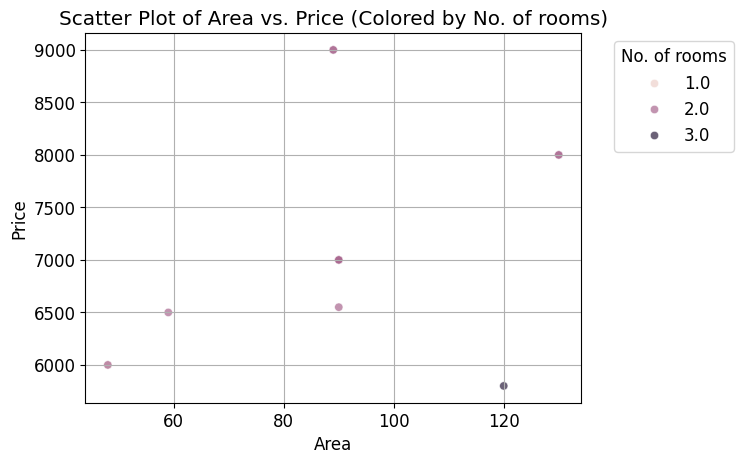

Tonalá
Lineal Regression:
Mean Squared Error: 3058195.627308853
Mean Absolute Error: 1279.374935776051
R-squared: -2.099522595245459
Root Mean Squared Error: 1748.7697467959733
Polynomial Regression:
Mean Squared Error: 256824717.74765968
Mean Absolute Error: 12699.207427540716
R-squared: -259.29532204154697
Root Mean Squared Error: 16025.751706165289
50.835987261146485 188.6066878980892


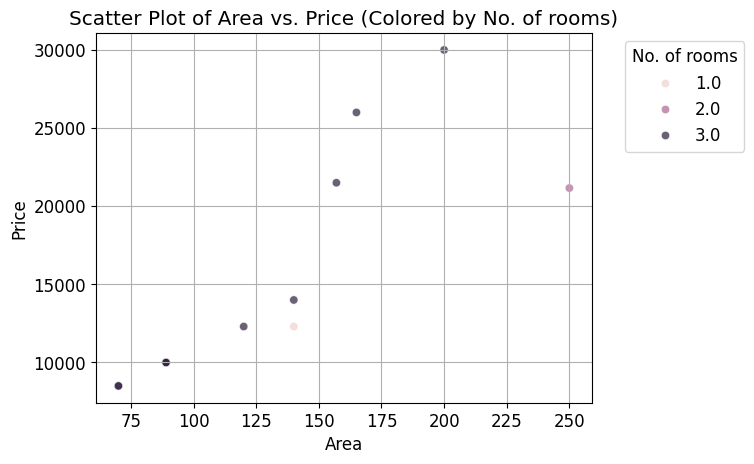

Other
Lineal Regression:
Mean Squared Error: 55743366.29310468
Mean Absolute Error: 6196.594322768479
R-squared: 0.3604967538075945
Root Mean Squared Error: 7466.148022448033
Polynomial Regression:
Mean Squared Error: 33235555852.89011
Mean Absolute Error: 143530.5395900959
R-squared: -380.2874476430988
Root Mean Squared Error: 182306.21452076203
44.13849247721513 185.94851545592016


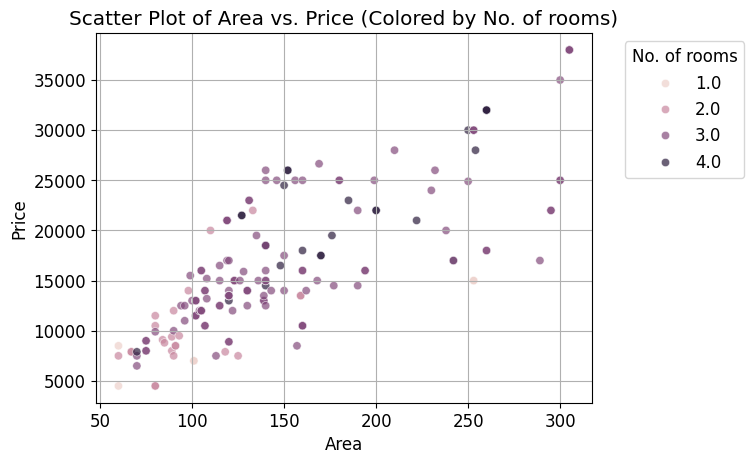

Tlajomulco de Zúñiga
Lineal Regression:
Mean Squared Error: 15746431.878213668
Mean Absolute Error: 3095.256032267988
R-squared: 0.5970765827305746
Root Mean Squared Error: 3968.1774000432074
Polynomial Regression:
Mean Squared Error: 18226324.94790595
Mean Absolute Error: 3058.2259559083677
R-squared: 0.533620493260194
Root Mean Squared Error: 4269.230018153853


In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

degree = 2  # You can adjust the degree of the polynomial
polyreg = make_pipeline(PolynomialFeatures(degree), LinearRegression())

unique_municipalities = proces_data['Municipality'].unique()

# Iterate over the unique municipalities
for municipality in unique_municipalities:
    # Filter the dataset for the current municipality
    municipality_data = proces_data[proces_data['Municipality'] == municipality]
    municipality_data = remove_outliers(municipality_data, "Price per sq meter")
    #municipality_data = remove_outliers(municipality_data, "No. of rooms")
    #municipality_data = remove_outliers(municipality_data, "Area")
    #plt.figure(figsize=(10, 6))
    sns.scatterplot(x='Area', y='Price', hue='No. of rooms', data=municipality_data, alpha=0.7)
    plt.title('Scatter Plot of Area vs. Price (Colored by No. of rooms)')
    plt.xlabel('Area')
    plt.ylabel('Price')
    plt.grid(True)
    plt.legend(title='No. of rooms', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.show()
    X = municipality_data[['No. of rooms', 'No. of bathrooms', 'Area']]
    y = municipality_data['Price'] # Target variable

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    model = LinearRegression()
    model.fit(X_train, y_train)

# Predicting prices for the test set
    y_pred = model.predict(X_test)

# Evaluating the model with different metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mse)
    print(municipality)
    print("Lineal Regression:")
    print("Mean Squared Error:", mse)
    print("Mean Absolute Error:", mae)
    print("R-squared:", r2)
    print("Root Mean Squared Error:", rmse)

    polyreg.fit(X_train, y_train)

# Predicting prices for the test set
    y_pred_poly = polyreg.predict(X_test)

# Evaluating the model with different metrics
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    mae_poly = mean_absolute_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)
    rmse_poly = np.sqrt(mse_poly)

    print("Polynomial Regression:")
    print("Mean Squared Error:", mse_poly)
    print("Mean Absolute Error:", mae_poly)
    print("R-squared:", r2_poly)
    print("Root Mean Squared Error:", rmse_poly)

    # Export the filtered dataset to a CSV file
    file_name = f'{municipality}_data.csv'  # Naming the file based on the municipality
    municipality_data.to_csv(file_name, index=False)


In [ ]:
proces_data.to_csv('proces_data.csv', index=False)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Split the dataset into features and target variable
X = proces_data[['No. of rooms', 'No. of bathrooms', 'Area']]
y = proces_data['Price_Category'] # Target variable

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Gradient Boosting Classifier
# You can specify hyperparameters like learning_rate, n_estimators, max_depth, etc.

gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting Classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       0-10k       0.50      0.22      0.31        27
     10k-20k       0.50      0.60      0.54        94
     20k-30k       0.55      0.64      0.60       121
     30k-40k       0.50      0.21      0.30        43
     40k-50k       0.26      0.36      0.30        14
     50k-70k       0.67      0.29      0.40         7

    accuracy                           0.51       306
   macro avg       0.50      0.39      0.41       306
weighted avg       0.51      0.51      0.49       306



In [ ]:
from collections import Counter

# Assuming y_train contains the labels/categories for your training set
category_counts = Counter(y)

# Print the counts for each category
for category, count in category_counts.items():
    print(f"{category}: {count}")

0-10k: 127
10k-20k: 538
20k-30k: 543
30k-40k: 199
50k-70k: 34
40k-50k: 85


In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

# Assuming your dataset is loaded into a Pandas DataFrame called 'data'

# Separate features and target variable
X = proces_data[['No. of rooms', 'No. of bathrooms', 'Area']]
y = proces_data['Price_Category'] # Target variable

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to generate synthetic samples
X_resampled, y_resampled = smote.fit_resample(X, y)

# Convert the resampled data back to DataFrame
resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['Price_Category'] = y_resampled
resampled_data['Municipality'] = proces_data['Municipality']
# Now you have a resampled dataset with balanced classes

In [ ]:
category_counts = Counter(y_resampled)

# Print the counts for each category
for category, count in category_counts.items():
    print(f"{category}: {count}")

0-10k: 543
10k-20k: 543
20k-30k: 543
30k-40k: 543
50k-70k: 543
40k-50k: 543


In [ ]:
resampled_data.to_csv('resampled_data.csv', index=False)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
gb_classifier = GradientBoostingClassifier( random_state = 42)

# Train the Gradient Boosting Classifier on the training data
gb_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gb_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       0-10k       0.78      0.76      0.77       112
     10k-20k       0.54      0.58      0.56       108
     20k-30k       0.63      0.50      0.56       127
     30k-40k       0.61      0.61      0.61       118
     40k-50k       0.64      0.77      0.70        90
     50k-70k       0.83      0.84      0.83        97

    accuracy                           0.67       652
   macro avg       0.67      0.68      0.67       652
weighted avg       0.67      0.67      0.66       652



In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the Gradient Boosting Classifier
gb_classifier = GradientBoostingClassifier(random_state=42)

# Train the Gradient Boosting Classifier on the standardized training data
gb_classifier.fit(X_train_scaled, y_train)

# Make predictions on the standardized test data
y_pred = gb_classifier.predict(X_test_scaled)

# Evaluate the model
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

       0-10k       0.78      0.76      0.77       112
     10k-20k       0.54      0.58      0.56       108
     20k-30k       0.63      0.50      0.56       127
     30k-40k       0.61      0.61      0.61       118
     40k-50k       0.63      0.77      0.69        90
     50k-70k       0.83      0.84      0.83        97

    accuracy                           0.66       652
   macro avg       0.67      0.68      0.67       652
weighted avg       0.67      0.66      0.66       652



In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train SVM classifier
svm = SVC(kernel='linear', C=1.0, random_state=42)
svm.fit(X_train, y_train)

# Predict on
y_pred = svm.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.4110429447852761


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

clf = RandomForestClassifier(n_estimators=100, random_state=42,)
clf.fit(X_train, y_train)

# Making predictions
y_pred = clf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.6457055214723927


In [ ]:
average_price_per_neighborhood = proces_data.groupby('Neighborhood')['Price'].mean()

print(average_price_per_neighborhood)

Neighborhood
12 de Diciembre          14000.000000
Adamar                   10850.000000
Agraria                  28000.000000
Agustín YAnez            33000.000000
Alameda                   7000.000000
                             ...     
Vista Sur Residencial     8100.000000
Volcán Del Colli         18500.000000
Zapopan                  19516.666667
Zapopan Centro           12200.000000
Zoquipan                 24500.000000
Name: Price, Length: 285, dtype: float64


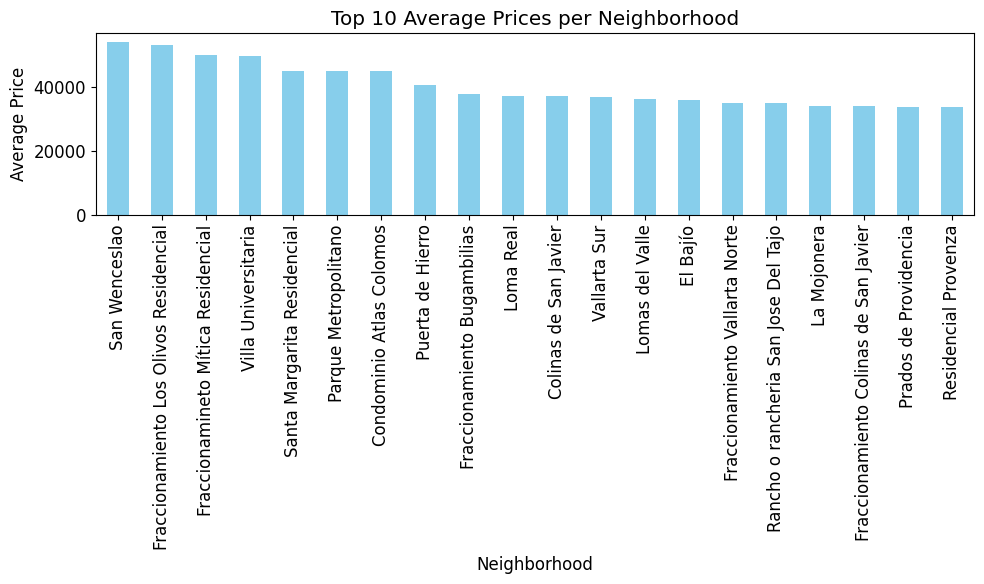

In [ ]:
import matplotlib.pyplot as plt

# Assuming average_price_per_neighborhood is the Series containing average prices per neighborhood

# Sort the average prices in descending order and select the top 10
top_10_neighborhoods = average_price_per_neighborhood.sort_values(ascending=False).head(20)

# Plotting the top 10 average prices
top_10_neighborhoods.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Average Prices per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()


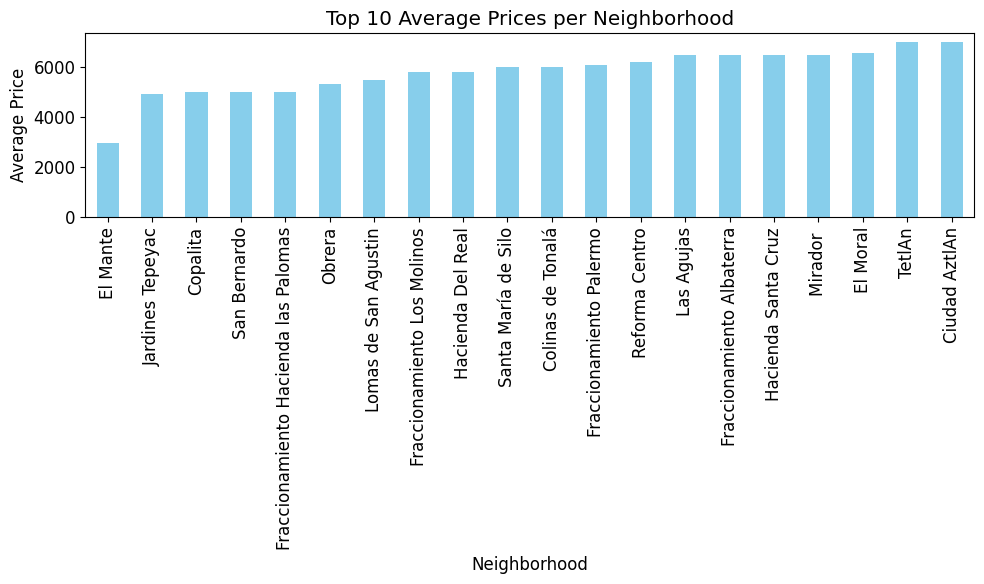

In [ ]:
bottom_10_neighborhoods = average_price_per_neighborhood.sort_values(ascending=True).head(20)

# Plotting the top 10 average prices
bottom_10_neighborhoods.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Top 10 Average Prices per Neighborhood')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()